<a href="https://colab.research.google.com/github/EduardoHAnacleto/Greenhouse-gas-Emissions-Machine-Learning/blob/main/MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!nvidia-smi

Fri Oct 11 02:15:17 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:


!pip install \
    --extra-index-url=https://pypi.nvidia.com \
    cudf-cu12==24.8.* dask-cudf-cu12==24.8.* cuml-cu12==24.8.* \
    cugraph-cu12==24.8.* cuspatial-cu12==24.8.* cuproj-cu12==24.8.* \
    cuxfilter-cu12==24.8.* cucim-cu12==24.8.* pylibraft-cu12==24.8.* \
    raft-dask-cu12==24.8.* cuvs-cu12==24.8.* nx-cugraph-cu12==24.8.*




Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.8/517.8 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 GB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 915.4/915.4 kB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.5/83.5 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 GB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
%load_ext cudf.pandas

In [ ]:
from google.colab import drive
import numpy as np
#import cudf
import pandas as pd

import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as sm
#import category_encoders as ce
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import seaborn as sns
from sklearn.ensemble import IsolationForest
import scipy.stats as stats
import os
from sklearn.preprocessing import LabelEncoder
import gc
import itertools
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.svm import SVR
#import lightgbm as lgb
#import cuml
import pickle
import joblib
from sklearn.feature_extraction import FeatureHasher

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/DatasetML/emissions_by_fuel.csv'

emissions_by_fuel = pd.read_csv(file_path, encoding='cp1252', dtype={"Other Fuel Name": "string", "Blend Fuel Name": "string"})
emissions_by_fuel = emissions_by_fuel.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)) #Limpa todos os espaços depois da ultima letra
emissions_by_fuel = emissions_by_fuel.map(lambda s: s.lower() if type(s) == str else s)  #Deixa todas strings e chars com letra minuscula
emissions_by_fuel.columns = emissions_by_fuel.columns.str.strip()

Mounted at /content/drive


In [ ]:
emissions_by_fuel.info()
#emissions_by_unit.info()
#emissions_by_unit.columns
emissions_by_fuel.head(3)
#emissions_by_fuel['Facility Name'].nunique()
#emissions_by_unit.head(3)
#emissions_by_fuel['General Fuel Type'].unique()
#dsIndType.head()
#emissions_by_fuel.head(3)
#emissions_by_fuel['City'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300397 entries, 0 to 300396
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   Facility Id                                   300397 non-null  int64  
 1   FRS Id                                        271450 non-null  float64
 2   Facility Name                                 300397 non-null  object 
 3   City                                          300397 non-null  object 
 4   State                                         300397 non-null  object 
 5   Primary NAICS Code                            299965 non-null  float64
 6   Reporting Year                                300397 non-null  int64  
 7   Industry Type (subparts)                      300397 non-null  object 
 8   Industry Type (sectors)                       300373 non-null  object 
 9   Unit Name                                     30

,Facility Id,FRS Id,Facility Name,City,State,Primary NAICS Code,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Name,General Fuel Type,Specific Fuel Type,Other Fuel Name,Blend Fuel Name,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,1012147,NaN,17z gas plant - chevron usa inc.,mckittrick,ca,211130.0,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",cp-03.00,natural gas,natural gas (weighted u.s. average),None,None,1.5,1.788
1,1012147,NaN,17z gas plant - chevron usa inc.,mckittrick,ca,211130.0,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",cp-03.01,natural gas,natural gas (weighted u.s. average),None,None,0.0,0.000
2,1012147,NaN,17z gas plant - chevron usa inc.,mckittrick,ca,211130.0,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",cp-03.02,natural gas,natural gas (weighted u.s. average),None,None,0.0,0.000


In [ ]:
########### DATA CLEANING & PREPROCESSING 1 - Drop Columns and Create Total Emissions

columns_to_drop = ['Facility Id', 'FRS Id', 'Primary NAICS Code', 'Specific Fuel Type', 'Other Fuel Name', 'Blend Fuel Name','Unit Name','Facility Name','City']
emissions_by_fuel_cleaned = emissions_by_fuel.drop(columns=columns_to_drop)

# apply strip on features
emissions_by_fuel_cleaned['State'] = emissions_by_fuel_cleaned['State'].str.strip()
emissions_by_fuel_cleaned['General Fuel Type'] = emissions_by_fuel_cleaned['General Fuel Type'].str.strip()

emissions_by_fuel_cleaned.head()

,State,Reporting Year,Industry Type (subparts),Industry Type (sectors),General Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e)
0,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",natural gas,1.50,1.788
1,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",natural gas,0.00,0.000
2,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",natural gas,0.00,0.000
3,ca,2017,"c,nn,w","natural gas and natural gas liquids suppliers,...",natural gas,4.25,5.066
4,ca,2016,"c,nn,w","natural gas and natural gas liquids suppliers,...",natural gas,4.75,5.662


In [ ]:
# Função para calcular Q1, Q3 e os limites para outliers
def calculate_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1  # Intervalo interquartil (IQR)

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'Limite Inferior: {lower_bound}')
    print(f'Limite Superior: {upper_bound}')

    return lower_bound, upper_bound

# Calcular Q1, Q3 e limites para 'Fuel Methane (CH4) emissions (mt CO2e)'
print("Outliers para 'Fuel Methane (CH4) emissions (mt CO2e)'")
methane_lower, methane_upper = calculate_outliers(emissions_by_fuel_cleaned['Fuel Methane (CH4) emissions (mt CO2e)'])
print("\n")

# Calcular Q1, Q3 e limites para 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'
print("Outliers para 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'")
nitrous_lower, nitrous_upper = calculate_outliers(emissions_by_fuel_cleaned['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
print("\n")

# Função para remover outliers e valores negativos, e mostrar a quantidade de registros apagados
def remove_outliers(df, column_name):
    lower_bound, upper_bound = calculate_outliers(df[column_name])

    # Calcular registros antes da remoção
    initial_count = len(df)

    # Remover outliers (valores fora dos limites) e valores menores que zero
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    df_cleaned = df_cleaned[df_cleaned[column_name] >= 0]  # Remover valores menores que zero

    # Calcular registros após a remoção
    final_count = len(df_cleaned)

    # Mostrar a quantidade de registros removidos
    removed_count = initial_count - final_count
    print(f"Registros removidos para '{column_name}': {removed_count}")

    return df_cleaned

# Aplicar a função de remoção de outliers e valores menores que zero nas colunas de metano e nitrogênio
emissions_by_fuel_cleaned = remove_outliers(emissions_by_fuel_cleaned, 'Fuel Methane (CH4) emissions (mt CO2e)')
emissions_by_fuel_cleaned = remove_outliers(emissions_by_fuel_cleaned, 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)')


Outliers para 'Fuel Methane (CH4) emissions (mt CO2e)'
Q1: 0.0
Q3: 21.5
Limite Inferior: -32.25
Limite Superior: 53.75


Outliers para 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'
Q1: 0.0
Q3: 28.906
Limite Inferior: -43.358999999999995
Limite Superior: 72.26499999999999


Q1: 0.0
Q3: 21.5
Limite Inferior: -32.25
Limite Superior: 53.75
Registros removidos para 'Fuel Methane (CH4) emissions (mt CO2e)': 47581
Q1: 0.0
Q3: 11.92
Limite Inferior: -17.88
Limite Superior: 29.799999999999997
Registros removidos para 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)': 27020


In [ ]:
############## DATA TRANSFORMATION 1 - One-Hot-Encode Industry Type (sectors) and (subparts)

# Fill Nulls with 'Unknown' for 'Industry Type (sectors)'
#emissions_by_fuel_cleaned['Industry Type (sectors)'] = emissions_by_fuel_cleaned['Industry Type (sectors)'].fillna('Unknown').astype(str)
emissions_by_fuel_cleaned = emissions_by_fuel_cleaned.dropna(subset=['Industry Type (sectors)'])
emissions_by_fuel_cleaned['Industry Type (sectors)'] = emissions_by_fuel_cleaned['Industry Type (sectors)'].apply(lambda x: ','.join([i.strip() for i in x.split(',')]))
# One-Hot-Encodingd directly into categories separated by commas
industry_sectors_dummies = emissions_by_fuel_cleaned['Industry Type (sectors)'].str.get_dummies(sep=',')
# Join the new boolean columns to the original dataset
emissions_by_fuel_cleaned = pd.concat([emissions_by_fuel_cleaned, industry_sectors_dummies], axis=1)

###########
# Repeat the process for 'Industry Type (subparts)'
# Replace 'rr (rpt)' by a single string, without spaces or parentheses
emissions_by_fuel_cleaned['Industry Type (subparts)'] = emissions_by_fuel_cleaned['Industry Type (subparts)'].str.replace('rr (rpt)', 'rr_rpt')
# Remove spaces before and after each word after comma separation
emissions_by_fuel_cleaned['Industry Type (subparts)'] = emissions_by_fuel_cleaned['Industry Type (subparts)'].apply(lambda x: ','.join([i.strip() for i in x.split(',')]))
# One-Hot-Encoding on cleaned categories
industry_subparts_dummies = emissions_by_fuel_cleaned['Industry Type (subparts)'].str.get_dummies(sep=',')
# Replace again 'rr_rpt' por 'rr (rpt)' on dummies column
industry_subparts_dummies.columns = industry_subparts_dummies.columns.str.replace('rr_rpt', 'rr (rpt)')
# Join the new boolean columns to the original dataset
emissions_by_fuel_cleaned = pd.concat([emissions_by_fuel_cleaned, industry_subparts_dummies], axis=1)
emissions_by_fuel_cleaned = emissions_by_fuel_cleaned.drop(columns=['Industry Type (subparts)'])
emissions_by_fuel_cleaned = emissions_by_fuel_cleaned.drop(columns=['Industry Type (sectors)'])

############## DATA TRANSFORMATION 2- ONE-HOT-ENCODING - STATE & REPORTING YEAR

emissions_by_fuel_cleaned = emissions_by_fuel_cleaned.dropna()

emissions_by_fuel_cleaned = pd.get_dummies(emissions_by_fuel_cleaned, columns=['State','General Fuel Type'], drop_first=False)

# Show resulted dataset
emissions_by_fuel_cleaned.head(3)

,State,Reporting Year,General Fuel Type,Fuel Methane (CH4) emissions (mt CO2e),Fuel Nitrous Oxide (N2O) emissions (mt CO2e),chemicals,coal-based liquid fuel supply,import and export of equipment containing fluorintaed ghgs,industrial gas suppliers,injection of co2,...,ss,t,tt,u,uu,v,w,x,y,z
0,ca,2018,natural gas,1.5,1.788,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,ca,2018,natural gas,0.0,0.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ca,2018,natural gas,0.0,0.000,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Define a function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Print the results
    print(f"{model_name} Results:")
    print(f"Train MAE: {mae_train}, Test MAE: {mae_test}")
    print(f"Train MSE: {mse_train}, Test MSE: {mse_test}")
    print(f"Train R²: {r2_train}, Test R²: {r2_test}")
    print("\n")

# Load the dataset (replace with actual dataset loading)
# emissions_by_unit_cleaned = pd.read_csv('emissions_by_unit_cleaned.csv')

# Define the selected features
selected_features = ['Reporting Year', 'chemicals', 'coal-based liquid fuel supply', 'injection of co2', 'metals',
                     'minerals', 'natural gas and natural gas liquids suppliers', 'other',
                     'petroleum and natural gas systems', 'petroleum product suppliers',
                     'power plants', 'pulp and paper', 'refineries', 'suppliers of co2', 'waste',
                     'General Fuel Type_coal', 'General Fuel Type_natural gas', 'General Fuel Type_other',
                     'General Fuel Type_petroleum products']

# 1. Filter data up to the year 2021 for training, and 2022 for testing
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Separate features (X) and targets (y) for both 'Fuel Methane' and 'Fuel Nitrous Oxide'

# Methane Emissions
X_train_methane = data_train[selected_features]
y_train_methane = data_train['Fuel Methane (CH4) emissions (mt CO2e)']
X_test_methane = data_test_2022[selected_features]
y_test_methane = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# Nitrous Oxide Emissions
X_train_nitrous = data_train[selected_features]
y_train_nitrous = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']
X_test_nitrous = data_test_2022[selected_features]
y_test_nitrous = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Define a 2-fold cross-validation strategy
kf = KFold(n_splits=2, shuffle=True, random_state=42)

# Function to run models on methane and nitrous emissions
def run_models(X_train, y_train, X_test, y_test, target_name):
    print(f"\nTraining models for {target_name}...\n")

    # Decision Tree
    dt_params = {'max_depth': [10, 30, 50]}
    dt_model = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid=dt_params, cv=kf)
    train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

    # Random Forest
    rf_params = {'n_estimators': [30, 50, 100, 200], 'max_depth': [10, 30, 50, 100]}
    rf_model = GridSearchCV(RandomForestRegressor(random_state=42), param_grid=rf_params, cv=kf)
    train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

    # Support Vector Machine (SVM)
    svm_params = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
    svm_model = GridSearchCV(SVR(kernel='rbf'), param_grid=svm_params, cv=kf)
    train_and_evaluate_model(svm_model, X_train, y_train, X_test, y_test, "Support Vector Machine")

# Run models for Methane Emissions
run_models(X_train_methane, y_train_methane, X_test_methane, y_test_methane, "Methane (CH4)")

# Run models for Nitrous Oxide Emissions
run_models(X_train_nitrous, y_train_nitrous, X_test_nitrous, y_test_nitrous, "Nitrous Oxide (N2O)")



Training models for Nitrous Oxide (N2O)...

Support Vector Machine Results:
Train MAE: 4.0441843746267745, Test MAE: 5.01606061360507
Train MSE: 51.22385475435048, Test MSE: 55.7074227948334
Train R²: -0.03139055028384119, Test R²: -0.013131664729872261




Here Starts CUDA Import and Model Training

In [ ]:
import cuml
import cudf
from cuml.model_selection import train_test_split

Random Forest -

In [ ]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error
import pandas as pd


# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)
rf_model.fit(X_train, y_train)

# Calculate Permutation Importance
# Using scoring='neg_mean_absolute_error' for MAE
perm_importance = permutation_importance(rf_model, X_test, y_test, scoring='neg_mean_absolute_error', n_repeats=30, random_state=42)

# Create a DataFrame to display results
perm_importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by='Importance', ascending=False)

# Display the importance values
pd.set_option('display.max_rows', None)
print(perm_importance_df)

                                  Feature  Importance       Std
117  General Fuel Type_petroleum products    0.916836  0.023169
12                           power plants    0.520904  0.017222
54                                      w    0.285863  0.009358
30                                     hh    0.245301  0.012502
21                                      d    0.219326  0.006059
..                                    ...         ...       ...
112             General Fuel Type_biomass    0.000000  0.000000
118    General Fuel Type_solid byproducts    0.000000  0.000000
0                          Reporting Year    0.000000  0.000000
70                               State_hi   -0.000530  0.000538
106                              State_vi   -0.002625  0.000309

[119 rows x 3 columns]


# RFE RF

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
# 1. Filter data until Year 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Define X, y train (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Use 2022 as validation
X_test = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

#model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)

# RFE Selector
rfe_selector = RFE(estimator=rf_model, n_features_to_select=25, step=1)
rfe_selector.fit(X_train, y_train)

# Get the selected features and their importance
selected_features = X_train.columns[rfe_selector.support_]
print("Selected Features:")
print(selected_features)

# Evaluate model performance with the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

rf_model.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_rfe)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Selected Features:
Index(['Reporting Year', 'chemicals', 'metals', 'other',
       'petroleum product suppliers', 'power plants', 'waste', 'aa', 'c', 'h',
       'hh', 'pp', 'w', 'State_az', 'State_ca', 'State_dc', 'State_fl',
       'State_il', 'State_ma', 'State_ok', 'State_tx', 'State_ut',
       'General Fuel Type_natural gas', 'General Fuel Type_other',
       'General Fuel Type_petroleum products'],
      dtype='object')
MAE: 4.739010785776541
MSE: 44.6402909834808


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
# 1. Filter data until Year 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Define X, y train (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Use 2022 as validation
X_test = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']


# model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)

#RFE selector
rfe_selector = RFE(estimator=rf_model, n_features_to_select=100, step=1)
rfe_selector.fit(X_train, y_train)
selected_features100 = X_train.columns[rfe_selector.support_]
print("Selected Features:")
print(selected_features)

# Evaluate model
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Fit the model on the reduced set of features
rf_model.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_rfe)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Selected Features:
Index(['Reporting Year', 'chemicals', 'coal-based liquid fuel supply',
       'injection of co2', 'metals', 'minerals',
       'natural gas and natural gas liquids suppliers', 'other',
       'petroleum and natural gas systems', 'petroleum product suppliers',
       'power plants', 'pulp and paper', 'refineries', 'suppliers of co2',
       'waste', 'aa', 'bb', 'c', 'd', 'ff', 'g', 'gg', 'h', 'hh', 'i', 'ii',
       'k', 'l', 'mm', 'n', 'nn', 'p', 'pp', 'q', 'r', 's', 't', 'tt', 'u',
       'uu', 'v', 'w', 'x', 'y', 'z', 'State_ak', 'State_al', 'State_ar',
       'State_az', 'State_ca', 'State_co', 'State_ct', 'State_dc', 'State_de',
       'State_fl', 'State_ga', 'State_hi', 'State_ia', 'State_id', 'State_il',
       'State_in', 'State_ks', 'State_ky', 'State_la', 'State_ma', 'State_md',
       'State_me', 'State_mi', 'State_mn', 'State_mo', 'State_ms', 'State_mt',
       'State_nc', 'State_nd', 'State_ne', 'State_nh', 'State_nj', 'State_nm',
       'State_nv', 'Stat

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd
# 1. Filter data until Year 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Define X, y train (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Use 2022 as validation
X_test = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Define the model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=50, random_state=42)

#RFE selector
rfe_selector = RFE(estimator=rf_model, n_features_to_select=50, step=1)

rfe_selector.fit(X_train, y_train)
selected_features10 = X_train.columns[rfe_selector.support_]
print("Selected Features:")
print(selected_features)

# Evaluate model performance
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

rf_model.fit(X_train_rfe, y_train)

# Predict and evaluate
y_pred = rf_model.predict(X_test_rfe)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")


Selected Features:
Index(['Reporting Year', 'chemicals', 'coal-based liquid fuel supply',
       'injection of co2', 'metals', 'minerals',
       'natural gas and natural gas liquids suppliers', 'other',
       'petroleum and natural gas systems', 'petroleum product suppliers',
       'power plants', 'pulp and paper', 'refineries', 'suppliers of co2',
       'waste', 'aa', 'bb', 'c', 'd', 'ff', 'g', 'gg', 'h', 'hh', 'i', 'ii',
       'k', 'l', 'mm', 'n', 'nn', 'p', 'pp', 'q', 'r', 's', 't', 'tt', 'u',
       'uu', 'v', 'w', 'x', 'y', 'z', 'State_ak', 'State_al', 'State_ar',
       'State_az', 'State_ca', 'State_co', 'State_ct', 'State_dc', 'State_de',
       'State_fl', 'State_ga', 'State_hi', 'State_ia', 'State_id', 'State_il',
       'State_in', 'State_ks', 'State_ky', 'State_la', 'State_ma', 'State_md',
       'State_me', 'State_mi', 'State_mn', 'State_mo', 'State_ms', 'State_mt',
       'State_nc', 'State_nd', 'State_ne', 'State_nh', 'State_nj', 'State_nm',
       'State_nv', 'Stat

Decision Tree

10-Fold Cross-Validation Results:
Average MAE: 4.177455249486581
Average MSE: 38.83469052087051
Average R²: 0.2180423084737642
MAE (2022): 4.422093869166171
MSE (2022): 41.87582441683247
R² (2022): 0.23841883944959474


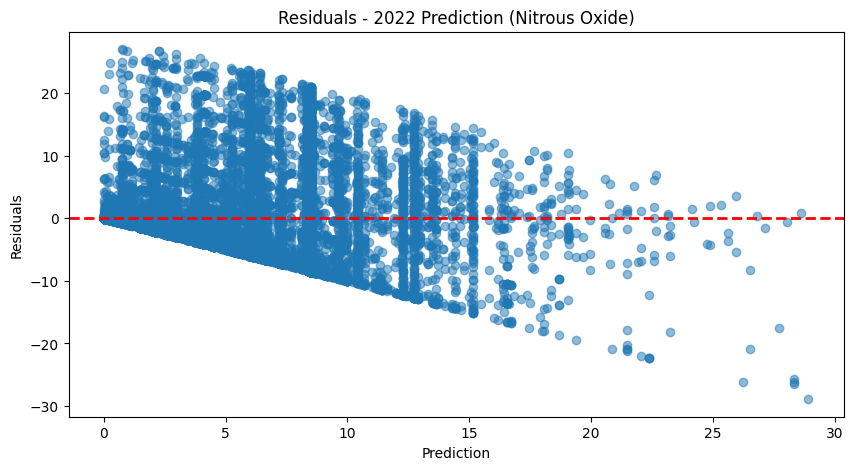

Modelo de Decision Tree para Nitrous Oxide salvo no Google Drive: /content/drive/My Drive/dtree_model_unit_nitrous.pkl
                                  Feature  Importance
117  General Fuel Type_petroleum products    0.281916
0                          Reporting Year    0.090010
30                                     hh    0.064120
116               General Fuel Type_other    0.044603
12                           power plants    0.022060
61                               State_az    0.019556
19                                      c    0.017124
6                                  metals    0.014613
65                               State_dc    0.014229
104                              State_ut    0.012456
16                                  waste    0.011671
54                                      w    0.011643
78                               State_ma    0.011217
103                              State_tx    0.010855
67                               State_fl    0.010628


3563

In [ ]:
# Decision Tree Regressor CPU Nitrous
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filter data until Year 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Define X, y train (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Use 2022 as validation
X_test = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 4. 10-Fold Cross-Validation Decision Tree
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model = DecisionTreeRegressor(max_depth=30, random_state=42)
    dt_model.fit(X_train_fold, y_train_fold)

    y_val_pred = dt_model.predict(X_val_fold)

    r2_val = r2_score(y_val_fold, y_val_pred)
    mae_val = mean_absolute_error(y_val_fold, y_val_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calculate and display average metrics for all folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Final model training with all training data
dt_model.fit(X_train, y_train)

# Predict nitrogen emissions for 2022
y_pred_2022 = dt_model.predict(X_test_2022)

# Evaluate 2022 predictions
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Residuals 2022
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Save model
model_path_nitrous = '/content/drive/My Drive/dtree_model_unit_nitrous.pkl'
joblib.dump(dt_model, model_path_nitrous)

# features importance
feature_importances = dt_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(15))

# Del
del(dt_model)
gc.collect()


10-Fold Cross-Validation Results:
Average MAE: 3.2776805064471675
Average MSE: 27.773615676489364
Average R²: 0.23627595285448882
MAE (2022): 3.3972362259632845
MSE (2022): 27.602422559603035
R² (2022): 0.28542292296956395


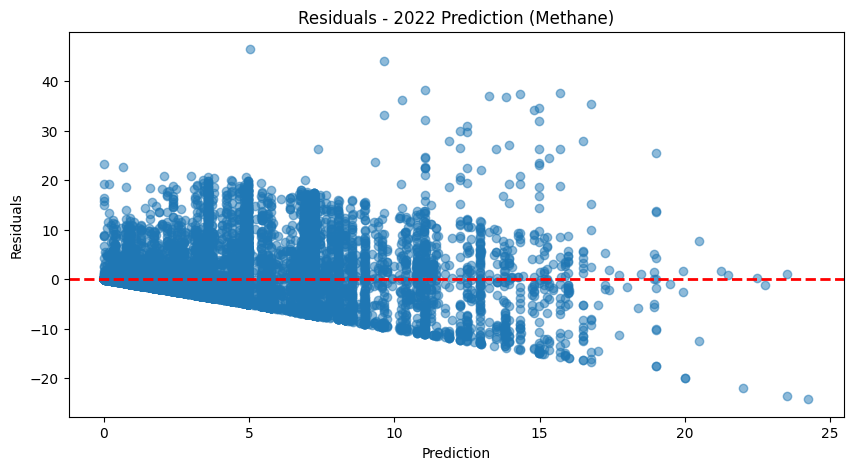

Modelo de Decision Tree para Methane salvo no Google Drive: /content/drive/My Drive/dtree_cpu_model_unit_methane.pkl
                                  Feature  Importance
117  General Fuel Type_petroleum products    0.344042
17                                     aa    0.086984
0                          Reporting Year    0.068256
30                                     hh    0.056510
61                               State_az    0.017162
116               General Fuel Type_other    0.016732
12                           power plants    0.014042
54                                      w    0.013256
65                               State_dc    0.013083
78                               State_ma    0.012667
19                                      c    0.012603
14                             refineries    0.012600
115         General Fuel Type_natural gas    0.011675
109                              State_wi    0.011267
104                              State_ut    0.011138


3565

In [ ]:
# Decision Tree Regressor CPU Methane
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc


data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Methane (CH4) emissions (mt CO2e)']

X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# 4. 10-Fold Cross-Validation Decision Tree
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    dt_model = DecisionTreeRegressor(max_depth=30, random_state=42)
    dt_model.fit(X_train_fold, y_train_fold)

    y_val_pred = dt_model.predict(X_val_fold)

    r2_val = r2_score(y_val_fold, y_val_pred)
    mae_val = mean_absolute_error(y_val_fold, y_val_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calculate and display average metrics for all folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

dt_model.fit(X_train, y_train)

y_pred_2022 = dt_model.predict(X_test_2022)

mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Residuals 2022
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

#Save model on Google Drive
model_path_methane = '/content/drive/My Drive/dtree_cpu_model_unit_methane.pkl'
joblib.dump(dt_model, model_path_methane)

feature_importances = dt_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
print(features_df.head(15))

# Del
del(dt_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results 

10-Fold Cross-Validation Results:
Average MAE: 3.2775532960760385
Average MSE: 27.732169899531733
Average R²: 0.23742512733250815
MAE (2022): 3.4090772298807916
MSE (2022): 27.914280377634608
R² (2022): 0.2773494849379241


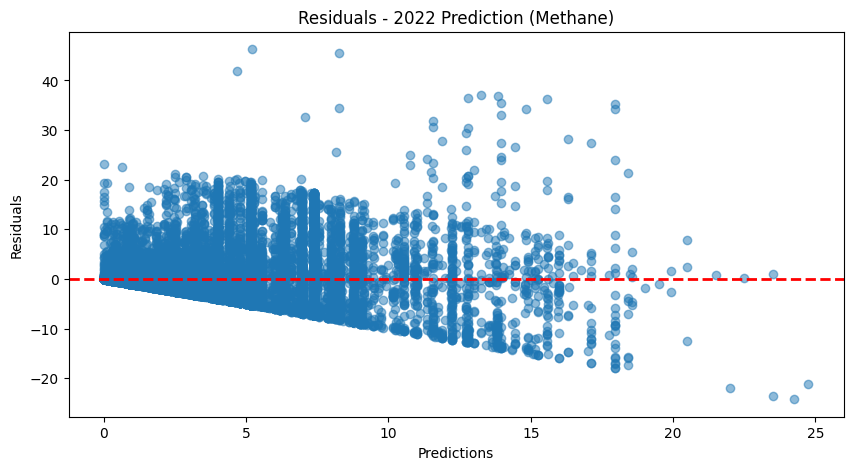

AttributeError: feature_importances_

In [ ]:
# Decision Tree via Random Forest com n_estimators=1 para simular uma árvore única
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Methane (CH4) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 4. 10-Fold Cross-Validation para max_depth com n_estimators=1
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Criar e treinar o modelo com n_estimators=1 e max_depth=30 para simular uma árvore única
    rf_model = cuRF(n_estimators=1, max_depth=30, random_state=42, bootstrap=False, max_features=1.0)
    rf_model.fit(X_train_fold, y_train_fold)

    # Fazer previsões no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
#best_rf_model = cuRF(n_estimators=1, max_depth=30, random_state=42, bootstrap=False, max_features=1.0)
#best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de metano para 2022
y_pred_2022 = rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
#model_path_methane = '/content/drive/My Drive/dtree_model_cuml_methane.pkl'

# Salvar o modelo treinado para metano
#joblib.dump(rf_model, model_path_methane)

#print(f'Modelo de metano salvo no Google Drive: {model_path_methane}')

feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(15)

# Apagar da memória
del(rf_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results 

10-Fold Cross-Validation Results:
Average MAE: 4.177304173858611
Average MSE: 38.830273275847716
Average R²: 0.21813534331865164
MAE (2022): 4.434344358411209
MSE (2022): 42.591981814222265
R² (2022): 0.2253943321249905


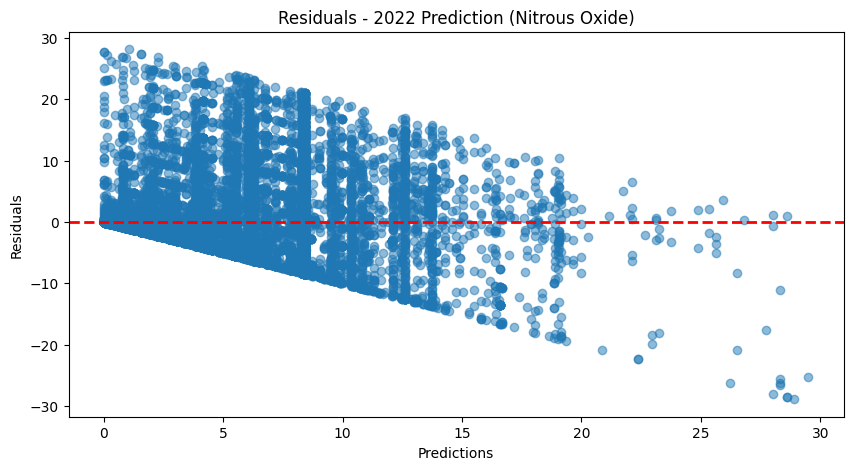

AttributeError: feature_importances_

In [ ]:
# Decision Tree via Random Forest com n_estimators=1 para simular uma árvore única
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 4. 10-Fold Cross-Validation para max_depth com n_estimators=1
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Criar e treinar o modelo com n_estimators=1 e max_depth=30 para simular uma árvore única
    rf_model = cuRF(n_estimators=1, max_depth=30, random_state=42, bootstrap=False, max_features=1.0)
    rf_model.fit(X_train_fold, y_train_fold)

    # Fazer previsões no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
#best_rf_model = cuRF(n_estimators=1, max_depth=30, random_state=42, bootstrap=False, max_features=1.0)
#best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de metano para 2022
y_pred_2022 = rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
#model_path_nitrous = '/content/drive/My Drive/dtree_model_cuml_nitrous.pkl'

# Salvar o modelo treinado para nitrogênio
#joblib.dump(best_rf_model, model_path_nitrous)

#print(f"Modelo de nitrogênio salvo no Google Drive: {model_path_nitrous}")

feature_importances = rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(15)

# Apagar da memória
del(rf_model)
gc.collect()


Random Forest

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results 

10-Fold Cross-Validation Results:
Average MAE: 3.393076874962959
Average MSE: 26.664851772785774
Average R²: 0.2667064752635052


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


MAE (2022): 3.5035603402646927
MSE (2022): 28.144177592696618
R² (2022): 0.2713978595107822


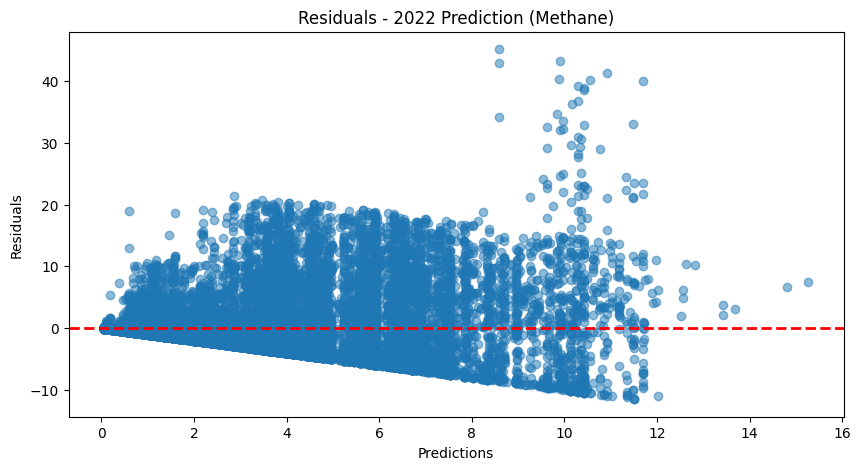

AttributeError: feature_importances_

In [ ]:
# Random Forest - Unit Methane (CH4) emissions
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Methane (CH4) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 4. 10-Fold Cross-Validation para n_estimators=200 e max_depth=100
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Criar e treinar o modelo com n_estimators=200 e max_depth=100
    rf_model = cuRF(n_estimators=200, max_depth=100, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Fazer previsões no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
best_rf_model = cuRF(n_estimators=200, max_depth=100, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de metano para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
#model_path_methane = '/content/drive/My Drive/rf_model_cuml_methane.pkl'

# Salvar o modelo treinado para metano
#joblib.dump(best_rf_model, model_path_methane)

#print(f'Modelo de metano salvo no Google Drive: {model_path_methane}')

feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(15)

# Apagar da memória
del(best_rf_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results 

10-Fold Cross-Validation Results:
Average MAE: 4.346899622976418
Average MSE: 38.044865836347824
Average R²: 0.23395459594842977


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)


MAE (2022): 4.565077527389362
MSE (2022): 42.640996506874245
R² (2022): 0.2245029188326253


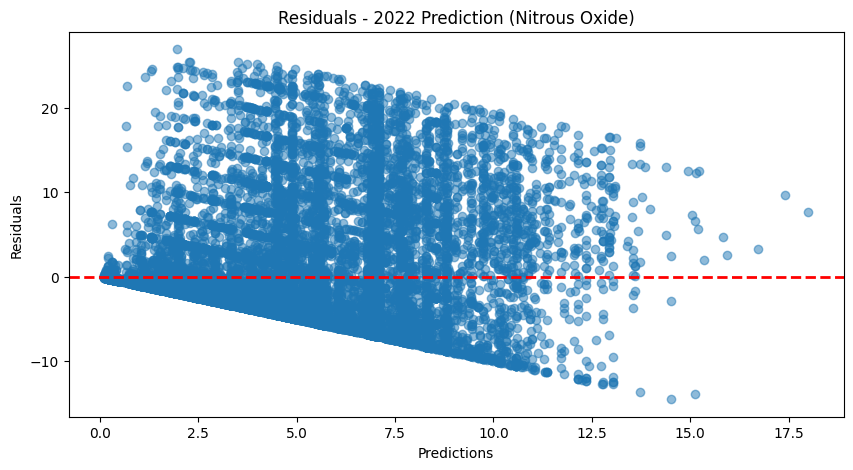

AttributeError: feature_importances_

In [ ]:
# Random Forest - Unit Nitrous Oxide (N2O) emissions
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 4. 10-Fold Cross-Validation com n_estimators=200 e max_depth=100
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Criar e treinar o modelo com n_estimators=200 e max_depth=100
    rf_model = cuRF(n_estimators=200, max_depth=100, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Fazer previsões no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
best_rf_model = cuRF(n_estimators=200, max_depth=100, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de nitrogênio para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
#model_path_nitro = '/content/drive/My Drive/rf_model_cuml_nitro.pkl'

# Salvar o modelo treinado para nitrogênio
#joblib.dump(best_rf_model, model_path_nitro)

#print(f'Modelo de nitrogênio salvo no Google Drive: {model_path_nitro}')

feature_importances = best_rf_model.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
features_df = features_df.sort_values(by='Importance', ascending=False)
features_df.head(15)

# Apagar da memória
del(best_rf_model)
gc.collect()


SVM

10-Fold Cross-Validation Results:
Average MAE: 2.8961131811141967
Average MSE: 30.387987327575683
Average R²: 0.16435636281967164
MAE (2022): 3.2183339595794678
MSE (2022): 33.57084274291992
R² (2022): 0.1309112310409546


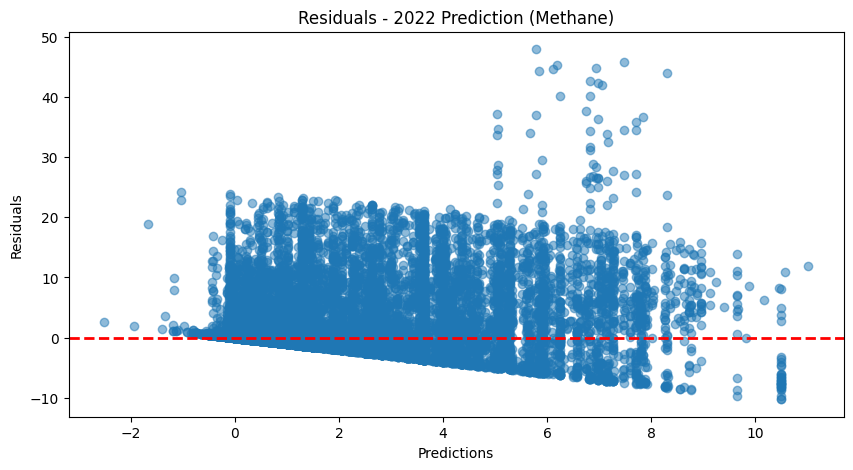

Vetores de suporte:            0    1    2    3    4    5    6    7    8    9    ...  109  110  \
0       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
1       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3       2017.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
4       2016.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
174087  2016.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
174088  2015.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
174089  2014.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
174090  2013.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
174091  2012.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   

        111  112  113  114  115  116  117  

0

In [ ]:
# SVM - Unit Methane (CH4) emissions
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Methane (CH4) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# Converter X e y para cuDF e float32
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# 4. 10-Fold Cross-Validation para diferentes valores de C e gamma
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Garantir que os folds também estejam em float32
    X_train_fold = X_train_fold.astype('float32')
    y_train_fold = y_train_fold.astype('float32')
    X_val_fold = X_val_fold.astype('float32')
    y_val_fold = y_val_fold.astype('float32')

    svm_model = cuSVR(kernel='rbf', C=10, gamma=0.1)
    svm_model.fit(X_train_fold, y_train_fold)

    # Prever no fold de validação
    y_val_pred = svm_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
best_svm_model = cuSVR(kernel='rbf', C=10, gamma=0.1)
best_svm_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de metano para 2022
y_pred_2022 = best_svm_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
#model_path_methane = '/content/drive/My Drive/svm_model_cuml_methane.pkl'

# Salvar o modelo treinado para metano
#joblib.dump(best_svm_model, model_path_methane)

#print(f'Modelo de metano salvo no Google Drive: {model_path_methane}')

print("Vetores de suporte:", best_svm_model.support_vectors_)
print("Coeficientes dual:", best_svm_model.dual_coef_)

# Apagar da memória
del(best_svm_model)
gc.collect()


10-Fold Cross-Validation Results:
Average MAE: 3.691061329841614
Average MSE: 43.52098007202149
Average R²: 0.12371322512626648
MAE (2022): 4.1940693855285645
MSE (2022): 51.41910934448242
R² (2022): 0.0648583173751831


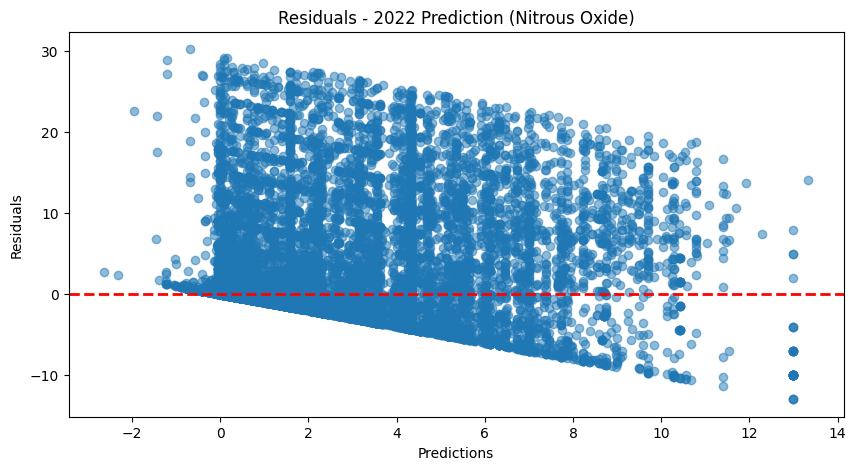

Modelo de nitrogênio salvo no Google Drive: /content/drive/My Drive/svm_model_cuml_nitro.pkl
Vetores de suporte:            0    1    2    3    4    5    6    7    8    9    ...  109  110  \
0       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
1       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
2       2018.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
3       2017.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
4       2016.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0   
...        ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
177847  2016.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
177848  2015.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
177849  2014.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
177850  2013.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0   
177851  2012.0  0.0  0.0  0.0

0

In [ ]:
# SVM - Unit Nitrous Oxide (N2O) emissions
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino (sem 'Fuel Methane' e 'Fuel Nitrous Oxide')
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Converter X e y para cuDF e float32
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# 4. 10-Fold Cross-Validation para diferentes valores de C e gamma
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Garantir que os folds também estejam em float32
    X_train_fold = X_train_fold.astype('float32')
    y_train_fold = y_train_fold.astype('float32')
    X_val_fold = X_val_fold.astype('float32')
    y_val_fold = y_val_fold.astype('float32')

    svm_model = cuSVR(kernel='rbf', C=10, gamma=0.1)
    svm_model.fit(X_train_fold, y_train_fold)

    # Prever no fold de validação
    y_val_pred = svm_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# 5. Treinar o modelo final com os parâmetros escolhidos
best_svm_model = cuSVR(kernel='rbf', C=10, gamma=0.1)
best_svm_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de nitrogênio para 2022
y_pred_2022 = best_svm_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# 6. Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_nitro = '/content/drive/My Drive/svm_model_cuml_nitro.pkl'

# Salvar o modelo treinado para nitrogênio
joblib.dump(best_svm_model, model_path_nitro)

print(f'Modelo de nitrogênio salvo no Google Drive: {model_path_nitro}')

print("Vetores de suporte:", best_svm_model.support_vectors_)
print("Coeficientes dual:", best_svm_model.dual_coef_)

# Apagar da memória
#del(best_svm_model)
gc.collect()


LightGBM

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.444647


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.444556


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.439831


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.434785


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.447564


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.437546


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.443582


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.454003


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.436488


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 4.438696


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


10-Fold Cross-Validation Results:
Average MAE: 4.052818572271962
Average MSE: 36.06804837203701
Average R²: 0.27376068924474317
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 208680, number of used features: 2
[LightGBM] [Info] Start training from score 4.442170


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


MAE (2022): 4.416465446340405
MSE (2022): 42.025832033521574
R² (2022): 0.23569070271675552

Feature Importances:
    Feature  Importance
1  svm_pred        1519
0   rf_pred        1481


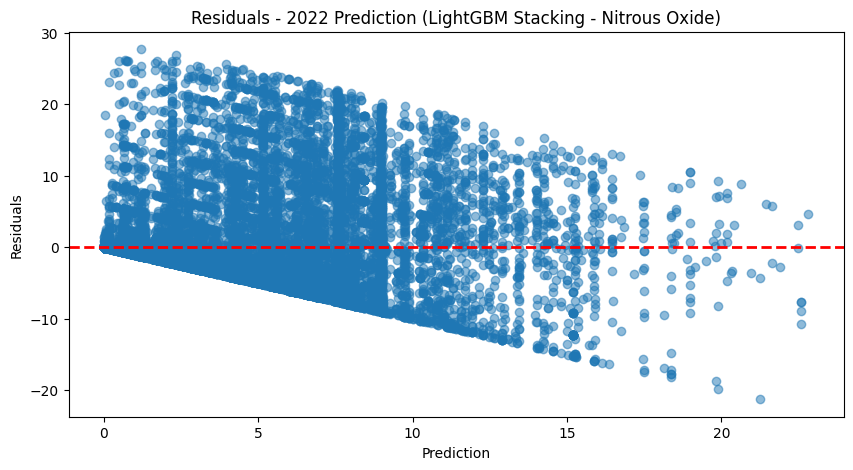

Modelo LightGBM Stacking salvo no Google Drive: /content/drive/My Drive/lgbm_stacking_model_nitro.pkl


3353

In [ ]:
# LightGBM with 10-Fold Cross-Validation and Residual Plot
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_nitro.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_nitro.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Nitrous Oxide (N2O) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# Realizar previsões com os modelos base (Random Forest e SVM)
rf_pred_train = rf_model.predict(X_train_cudf).to_pandas()
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()

svm_pred_train = svm_model.predict(X_train_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

# Empilhamento manual: Combinar previsões dos modelos base
train_stack = pd.DataFrame({
    'rf_pred': rf_pred_train,
    'svm_pred': svm_pred_train
})

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

# Definir o modelo meta (LightGBM)
lgbm_model = lgb.LGBMRegressor(random_state=42)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(train_stack):
    X_train_fold, X_val_fold = train_stack.iloc[train_index], train_stack.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Treinar LightGBM no conjunto de treino
    lgbm_model.fit(X_train_fold, y_train_fold)

    # Prever no conjunto de validação
    y_val_pred = lgbm_model.predict(X_val_fold)

    # Avaliar o desempenho
    r2_val = r2_score(y_val_fold, y_val_pred)
    mae_val = mean_absolute_error(y_val_fold, y_val_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular métricas médias
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com o conjunto completo
lgbm_model.fit(train_stack, y_train)

# Fazer previsões no conjunto de teste empilhado
y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar o modelo final
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Mostrar os coeficientes de importância do LightGBM
feature_importances = lgbm_model.feature_importances_
feature_names = train_stack.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - Nitrous Oxide)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_nitro = '/content/drive/My Drive/lgbm_stacking_model_nitro.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_nitro)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_nitro}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.538309


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.535701


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.533358


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.528437


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000592 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.540509


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.531733


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.538701


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.548109


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.532213


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 187812, number of used features: 2
[LightGBM] [Info] Start training from score 3.537070


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


10-Fold Cross-Validation Results:
Average MAE: 3.1541062285614196
Average MSE: 25.36027730824613
Average R²: 0.3026191428641256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 208680, number of used features: 2
[LightGBM] [Info] Start training from score 3.536414


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1218: UserWarning: Converting data to scipy sparse matrix.
  _log_warning("Converting data to scipy sparse matrix.")


MAE (2022): 3.352929528600645
MSE (2022): 27.660486500797997
R² (2022): 0.28391975196019426

Feature Importances:
    Feature  Importance
0   rf_pred        1531
1  svm_pred        1469


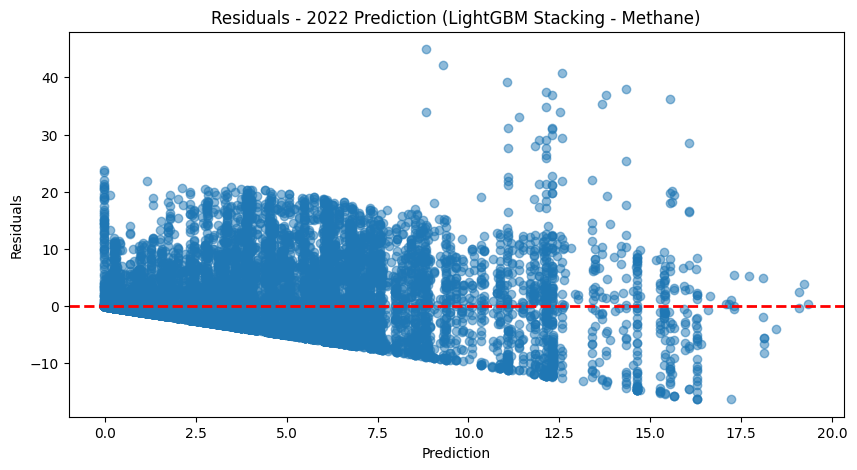

Modelo LightGBM Stacking salvo no Google Drive: /content/drive/My Drive/lgbm_stacking_model_methane.pkl


7192

In [ ]:
# LightGBM with 10-Fold Cross-Validation and Residual Plot
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_methane.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_methane.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_train = data_train['Fuel Methane (CH4) emissions (mt CO2e)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Fuel Methane (CH4) emissions (mt CO2e)', 'Fuel Nitrous Oxide (N2O) emissions (mt CO2e)'])
y_test_2022 = data_test_2022['Fuel Methane (CH4) emissions (mt CO2e)']

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# Realizar previsões com os modelos base (Random Forest e SVM)
rf_pred_train = rf_model.predict(X_train_cudf).to_pandas()
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()

svm_pred_train = svm_model.predict(X_train_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

# Empilhamento manual: Combinar previsões dos modelos base
train_stack = pd.DataFrame({
    'rf_pred': rf_pred_train,
    'svm_pred': svm_pred_train
})

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

# Definir o modelo meta (LightGBM)
lgbm_model = lgb.LGBMRegressor(random_state=42)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(train_stack):
    X_train_fold, X_val_fold = train_stack.iloc[train_index], train_stack.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Treinar LightGBM no conjunto de treino
    lgbm_model.fit(X_train_fold, y_train_fold)

    # Prever no conjunto de validação
    y_val_pred = lgbm_model.predict(X_val_fold)

    # Avaliar o desempenho
    r2_val = r2_score(y_val_fold, y_val_pred)
    mae_val = mean_absolute_error(y_val_fold, y_val_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular métricas médias
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com o conjunto completo
lgbm_model.fit(train_stack, y_train)

# Fazer previsões no conjunto de teste empilhado
y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar o modelo final
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Mostrar os coeficientes de importância do LightGBM
feature_importances = lgbm_model.feature_importances_
feature_names = train_stack.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - Methane)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_nitro = '/content/drive/My Drive/lgbm_stacking_model_methane.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_nitro)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_nitro}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


In [ ]:
########################

Emissions by UNIT

In [ ]:
##################
del(emissions_by_fuel)
del(emissions_by_fuel_cleaned)
gc.collect()

0

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/DatasetML/emissions_by_unit.csv'

emissions_by_unit = pd.read_csv(file_path, encoding='cp1252')
emissions_by_unit = emissions_by_unit.apply(lambda col: col.map(lambda x: x.strip() if isinstance(x, str) else x)) #Limpa todos os espaços depois da ultima letra
emissions_by_unit = emissions_by_unit.map(lambda s: s.lower() if type(s) == str else s)  #Deixa todas strings e chars com letra minuscula
emissions_by_unit.columns = emissions_by_unit.columns.str.strip()

Mounted at /content/drive


In [ ]:
########### DATA CLEANING & PREPROCESSING 1 - Drop Columns and Create Total Emissions

columns_to_drop = ['Facility Id', 'FRS Id', 'Primary NAICS Code','Unit Name','Facility Name','City']
emissions_by_unit_cleaned = emissions_by_unit.drop(columns=columns_to_drop)

# Aplicar strip nas colunas para remover o espaço antes e depois
emissions_by_unit_cleaned['State'] = emissions_by_unit_cleaned['State'].str.strip()

# Visualizar as primeiras linhas do dataset atualizado
emissions_by_unit_cleaned.head()

,State,Reporting Year,Industry Type (subparts),Industry Type (sectors),Unit Type,Unit Reporting Method,Unit Maximum Rated Heat Input Capacity (mmBTU/hr),Unit CO2 emissions (non-biogenic),Unit Methane (CH4) emissions,Unit Nitrous Oxide (N2O) emissions,Unit Biogenic CO2 emissions (metric tons)
0,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",ocs (other combustion source),tier1/2/3,30.0,3304.7,1.50,1.788,0.0
1,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",ocs (other combustion source),tier1/2/3,30.0,0.2,0.00,0.000,0.0
2,ca,2018,"c,nn,w","natural gas and natural gas liquids suppliers,...",ocs (other combustion source),tier1/2/3,30.0,175.0,0.00,0.000,0.0
3,ca,2017,"c,nn,w","natural gas and natural gas liquids suppliers,...",ocs (other combustion source),tier1/2/3,30.0,9106.1,4.25,5.066,0.0
4,ca,2016,"c,nn,w","natural gas and natural gas liquids suppliers,...",ocs (other combustion source),tier1/2/3,30.0,9922.2,4.75,5.662,0.0


In [ ]:
# Função para calcular Q1, Q3 e os limites para outliers
def calculate_outliers(column):
    Q1 = column.quantile(0.01)
    Q3 = column.quantile(0.90)
    IQR = Q3 - Q1  # Intervalo interquartil (IQR)

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'Limite Inferior: {lower_bound}')
    print(f'Limite Superior: {upper_bound}')

    return lower_bound, upper_bound

# Calcular Q1, Q3 e limites para 'Unit CO2 emissions (non-biogenic)'
print("Outliers para 'Unit CO2 emissions (non-biogenic)'")
co2_lower, co2_upper = calculate_outliers(emissions_by_unit_cleaned['Unit CO2 emissions (non-biogenic)'])
print("\n")

# Calcular Q1, Q3 e limites para 'Unit Methane (CH4) emissions'
print("Outliers para 'Unit Methane (CH4) emissions'")
methane_lower, methane_lower = calculate_outliers(emissions_by_unit_cleaned['Unit Methane (CH4) emissions'])
print("\n")

# Calcular Q1, Q3 e limites para 'Unit Nitrous Oxide (N2O) emissions'
print("Outliers para 'Unit Nitrous Oxide (N2O) emissions'")
nitrous_lower, nitrous_upper = calculate_outliers(emissions_by_unit_cleaned['Unit Nitrous Oxide (N2O) emissions'])
print("\n")

# Calcular Q1, Q3 e limites para 'Unit Biogenic CO2 emissions (metric tons)'
#print("Outliers para 'Unit Biogenic CO2 emissions (metric tons)'")
#co2b_lower, co2b_upper = calculate_outliers(emissions_by_unit_cleaned['Unit Biogenic CO2 emissions (metric tons)'])
#print("\n")

# Função para remover outliers e valores negativos, e mostrar a quantidade de registros apagados
def remove_outliers(df, column_name):
    lower_bound, upper_bound = calculate_outliers(df[column_name])

    # Calcular registros antes da remoção
    initial_count = len(df)

    # Remover outliers (valores fora dos limites) e valores menores que zero
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    df_cleaned = df_cleaned[df_cleaned[column_name] >= 0]  # Remover valores menores que zero

    # Calcular registros após a remoção
    final_count = len(df_cleaned)

    # Mostrar a quantidade de registros removidos
    removed_count = initial_count - final_count
    print(f"Registros removidos para '{column_name}': {removed_count}")

    return df_cleaned

# Aplicar a função de remoção de outliers e valores menores que zero nas colunas de metano e nitrogênio
emissions_by_unit_cleaned = remove_outliers(emissions_by_unit_cleaned, 'Unit CO2 emissions (non-biogenic)')
emissions_by_unit_cleaned = remove_outliers(emissions_by_unit_cleaned, 'Unit Methane (CH4) emissions')
emissions_by_unit_cleaned = remove_outliers(emissions_by_unit_cleaned, 'Unit Nitrous Oxide (N2O) emissions')
#emissions_by_unit_cleaned = remove_outliers(emissions_by_unit_cleaned, 'Unit Biogenic CO2 emissions (metric tons)')

Outliers para 'Unit CO2 emissions (non-biogenic)'
Q1: 0.0
Q3: 174641.64
Limite Inferior: -261962.46000000002
Limite Superior: 436604.10000000003


Outliers para 'Unit Methane (CH4) emissions'
Q1: 0.0
Q3: 207.25
Limite Inferior: -310.875
Limite Superior: 518.125


Outliers para 'Unit Nitrous Oxide (N2O) emissions'
Q1: 0.0
Q3: 329.886
Limite Inferior: -494.82900000000006
Limite Superior: 824.7150000000001


Q1: 0.0
Q3: 174641.64
Limite Inferior: -261962.46000000002
Limite Superior: 436604.10000000003
Registros removidos para 'Unit CO2 emissions (non-biogenic)': 15226
Q1: 0.0
Q3: 83.25
Limite Inferior: -124.875
Limite Superior: 208.125
Registros removidos para 'Unit Methane (CH4) emissions': 10516
Q1: 0.0
Q3: 74.5
Limite Inferior: -111.75
Limite Superior: 186.25
Registros removidos para 'Unit Nitrous Oxide (N2O) emissions': 9303


In [ ]:
############## DATA TRANSFORMATION 1 - One-Hot-Encode Industry Type (sectors) and (subparts) and Unit Type

# Preencher valores nulos com 'Unknown' para 'Industry Type (sectors)'
#emissions_by_unit_cleaned['Industry Type (sectors)'] = emissions_by_unit_cleaned['Industry Type (sectors)'].fillna('Unknown').astype(str)
emissions_by_unit_cleaned = emissions_by_unit_cleaned.dropna(subset=['Industry Type (sectors)'])
emissions_by_unit_cleaned['Industry Type (sectors)'] = emissions_by_unit_cleaned['Industry Type (sectors)'].apply(lambda x: ','.join([i.strip() for i in x.split(',')]))
# Aplicar One-Hot-Encoding diretamente nas categorias separadas por vírgula
industry_sectors_dummies = emissions_by_unit_cleaned['Industry Type (sectors)'].str.get_dummies(sep=',')
# Juntar as novas colunas booleanas ao dataset original
emissions_by_unit_cleaned = pd.concat([emissions_by_unit_cleaned, industry_sectors_dummies], axis=1)

# Preencher valores nulos com 'Unknown' para 'Unit Type'
emissions_by_unit_cleaned = emissions_by_unit_cleaned.dropna(subset=['Unit Type'])
emissions_by_unit_cleaned['Unit Type'] = emissions_by_unit_cleaned['Unit Type'].apply(lambda x: ','.join([i.strip() for i in x.split(',')]))
# Aplicar One-Hot-Encoding diretamente nas categorias separadas por vírgula
Unit_Type_dummies = emissions_by_unit_cleaned['Unit Type'].str.get_dummies(sep=',')
# Juntar as novas colunas booleanas ao dataset original
emissions_by_unit_cleaned = pd.concat([emissions_by_unit_cleaned, Unit_Type_dummies], axis=1)

# Repetir o processo para 'Industry Type (subparts)'
# Preencher valores nulos com 'Unknown'
#emissions_by_unit_cleaned['Industry Type (subparts)'] = emissions_by_unit_cleaned['Industry Type (subparts)'].fillna('Unknown')
# Substituir 'rr (rpt)' por uma string única, sem espaço ou parênteses
emissions_by_unit_cleaned['Industry Type (subparts)'] = emissions_by_unit_cleaned['Industry Type (subparts)'].str.replace('rr (rpt)', 'rr_rpt')
# Remover espaços antes e depois de cada palavra após a separação por vírgula
emissions_by_unit_cleaned['Industry Type (subparts)'] = emissions_by_unit_cleaned['Industry Type (subparts)'].apply(lambda x: ','.join([i.strip() for i in x.split(',')]))
# Aplicar One-Hot-Encoding nas categorias limpas
industry_subparts_dummies = emissions_by_unit_cleaned['Industry Type (subparts)'].str.get_dummies(sep=',')
# Substituir novamente 'rr_rpt' por 'rr (rpt)' nas colunas dummies
industry_subparts_dummies.columns = industry_subparts_dummies.columns.str.replace('rr_rpt', 'rr (rpt)')
# Juntar as novas colunas booleanas ao dataset original
emissions_by_unit_cleaned = pd.concat([emissions_by_unit_cleaned, industry_subparts_dummies], axis=1)
emissions_by_unit_cleaned = emissions_by_unit_cleaned.drop(columns=['Industry Type (subparts)'])
emissions_by_unit_cleaned = emissions_by_unit_cleaned.drop(columns=['Industry Type (sectors)'])
emissions_by_unit_cleaned = emissions_by_unit_cleaned.drop(columns=['Unit Type'])

# Exibir as primeiras linhas do dataset resultante com One-Hot Encoding
emissions_by_unit_cleaned.head(3)

,State,Reporting Year,Unit Reporting Method,Unit Maximum Rated Heat Input Capacity (mmBTU/hr),Unit CO2 emissions (non-biogenic),Unit Methane (CH4) emissions,Unit Nitrous Oxide (N2O) emissions,Unit Biogenic CO2 emissions (metric tons),chemicals,coal-based liquid fuel supply,...,ss,t,tt,u,uu,v,w,x,y,z
0,ca,2018,tier1/2/3,30.0,3304.7,1.5,1.788,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,ca,2018,tier1/2/3,30.0,0.2,0.0,0.000,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,ca,2018,tier1/2/3,30.0,175.0,0.0,0.000,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
############## DATA TRANSFORMATION 2- ONE-HOT-ENCODING - STATE & REPORTING YEAR

# 2. Criar a coluna 'Total Emissions' como a soma de 'Unit CO2 emissions (non-biogenic)' e 'Unit Methane (CH4) emissions'


mean_value = emissions_by_unit_cleaned['Unit Maximum Rated Heat Input Capacity (mmBTU/hr)'].mean()
emissions_by_unit_cleaned['Unit Maximum Rated Heat Input Capacity (mmBTU/hr)'] = emissions_by_unit_cleaned['Unit Maximum Rated Heat Input Capacity (mmBTU/hr)'].fillna(mean_value)

#emissions_by_unit_cleaned['Unit Maximum Rated Heat Input Capacity (mmBTU/hr)'] = emissions_by_unit_cleaned['Unit Maximum Rated Heat Input Capacity (mmBTU/hr)'].fillna(method='ffill')
#emissions_by_unit_cleaned = emissions_by_unit_cleaned.dropna()

emissions_by_unit_cleaned = pd.get_dummies(emissions_by_unit_cleaned, columns=['State','Unit Reporting Method'], drop_first=False)

# Exibir as primeiras linhas do dataset resultante com One-Hot Encoding
emissions_by_unit_cleaned.head(3)

,Reporting Year,Unit Maximum Rated Heat Input Capacity (mmBTU/hr),Unit CO2 emissions (non-biogenic),Unit Methane (CH4) emissions,Unit Nitrous Oxide (N2O) emissions,Unit Biogenic CO2 emissions (metric tons),chemicals,coal-based liquid fuel supply,import and export of equipment containing fluorintaed ghgs,industrial gas suppliers,...,State_ut,State_va,State_vi,State_vt,State_wa,State_wi,State_wv,State_wy,Unit Reporting Method_tier1/2/3,"Unit Reporting Method_tier4, alt-p75 or p75"
0,2018,30.0,3304.7,1.5,1.788,0.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,2018,30.0,0.2,0.0,0.000,0.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2018,30.0,175.0,0.0,0.000,0.0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False


# Modelse Emission By Unit - RF


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:18

10-Fold Cross-Validation Results:
Average MAE: 11.738828723420788
Average MSE: 516.9052384401639
Average R²: 0.44857486049608203


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE (2022): 12.064266886015877
MSE (2022): 538.0682672199484
R² (2022): 0.46172585461626914


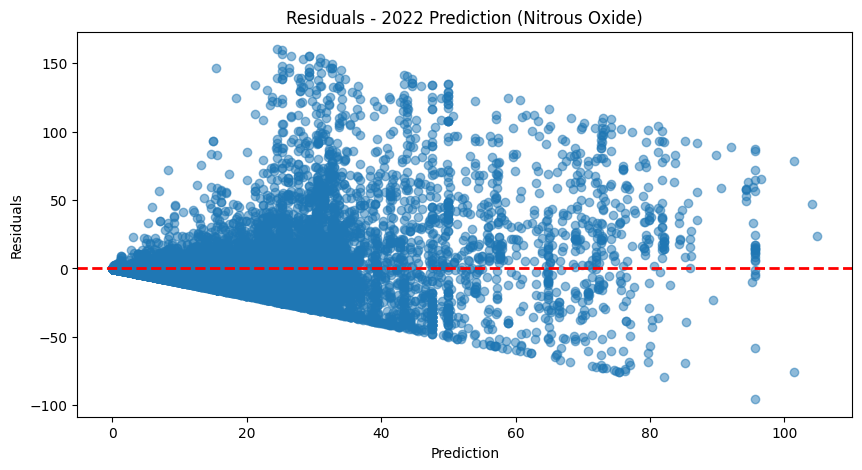

Modelo Random Forest (Nitrous Oxide) salvo em: /content/drive/My Drive/rf_model_cuml_nitrous.pkl


0

In [ ]:
# Random Forest - Unit Nitrous Oxide (N2O) emissions with cuML
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Nitrous Oxide (N2O) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Nitrous Oxide (N2O) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation com cuML
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_r2 = -float('inf')
best_params = None

# Configurações do modelo
n_estimators = 50
max_depth = 30

# Armazenar métricas de avaliação
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Treinando o modelo
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prevendo no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular métricas médias
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinando o modelo final com todos os dados de treino
best_rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prevendo as emissões para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliando as previsões
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/rf_model_cuml_nitrous.pkl'
joblib.dump(best_rf_model, model_path)
print(f"Modelo Random Forest (Nitrous Oxide) salvo em: {model_path}")

# Liberar memória
del(best_rf_model, rf_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:18

10-Fold Cross-Validation Results:
Average MAE: 15952.234525794647
Average MSE: 1114115146.550534
Average R²: 0.4241585598167812


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE (2022): 16818.73612378701
MSE (2022): 1224772284.6207821
R² (2022): 0.441271174381869


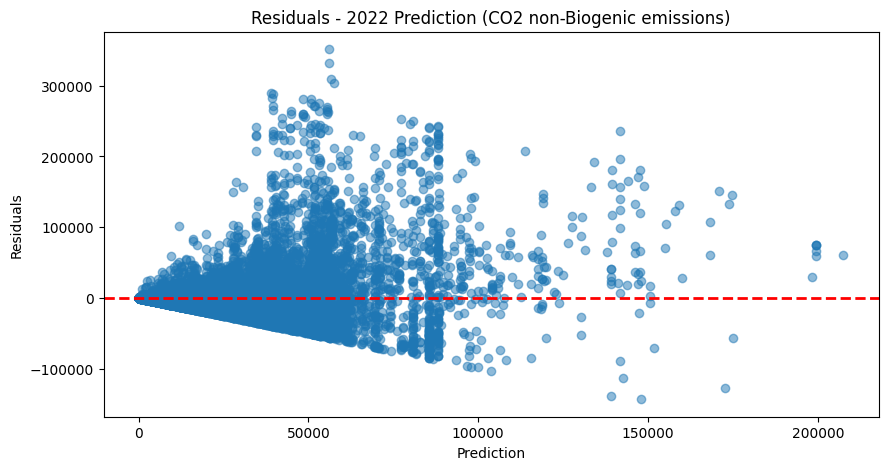

Modelo Random Forest (CO2 non-Biogenic) salvo em: /content/drive/My Drive/rf_model_cuml_co2nonbio.pkl


6128

In [ ]:
# Random Forest - Unit CO2 non-Biogenic emissions using cuML
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit CO2 emissions (non-biogenic)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit CO2 emissions (non-biogenic)']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_r2 = -float('inf')
best_params = None

# Configurações do modelo
n_estimators = 200
max_depth = 30

# Armazenar métricas de avaliação
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Treinando o modelo
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prevendo no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinando o modelo final com todos os dados de treino
best_rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prevendo as emissões para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (CO2 non-Biogenic emissions)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/rf_model_cuml_co2nonbio.pkl'
joblib.dump(best_rf_model, model_path)
print(f"Modelo Random Forest (CO2 non-Biogenic) salvo em: {model_path}")

# Liberar memória
del(best_rf_model, rf_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:18

10-Fold Cross-Validation Results:
Average MAE: 8.31052389164216
Average MSE: 262.88960465680634
Average R²: 0.42163140874848504


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE (2022): 8.641797315049088
MSE (2022): 284.17646065326124
R² (2022): 0.43646588066758907


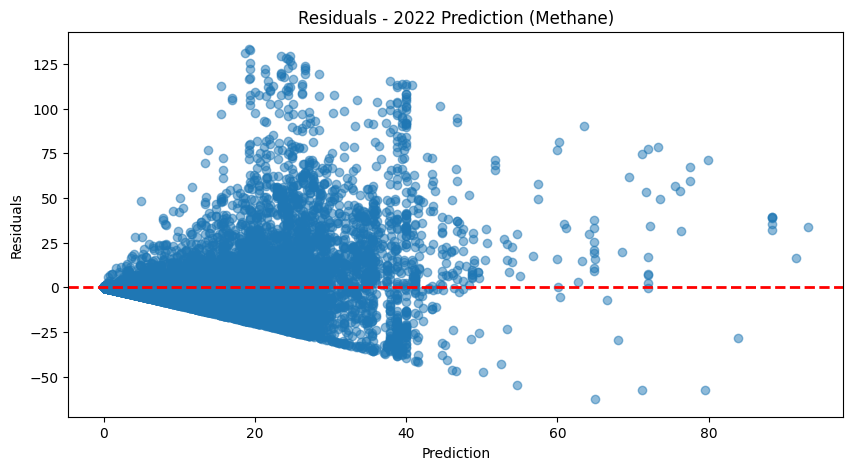

Modelo Random Forest (Methane) salvo em: /content/drive/My Drive/rf_model_cuml_methane.pkl


3496

In [ ]:
# Random Forest - Unit Methane (CH4) emissions using cuML
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Methane (CH4) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Methane (CH4) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
best_r2 = -float('inf')
best_params = None

# Configurações do modelo
n_estimators = 200
max_depth = 30

# Armazenar métricas de avaliação
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Treinando o modelo
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prevendo no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinando o modelo final com todos os dados de treino
best_rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prevendo as emissões de metano para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/rf_model_cuml_methane.pkl'
joblib.dump(best_rf_model, model_path)
print(f"Modelo Random Forest (Methane) salvo em: {model_path}")

# Liberar memória
del(best_rf_model, rf_model)
gc.collect()


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:18

10-Fold Cross-Validation Results:
Average MAE: 0.0
Average MSE: 0.0
Average R²: 1.0


/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:344: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return func(**kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:188: UserWarning: To use pickling first train using float32 data to fit the estimator
  ret = func(*args, **kwargs)


MAE (2022): 0.0
MSE (2022): 0.0
R² (2022): 1.0


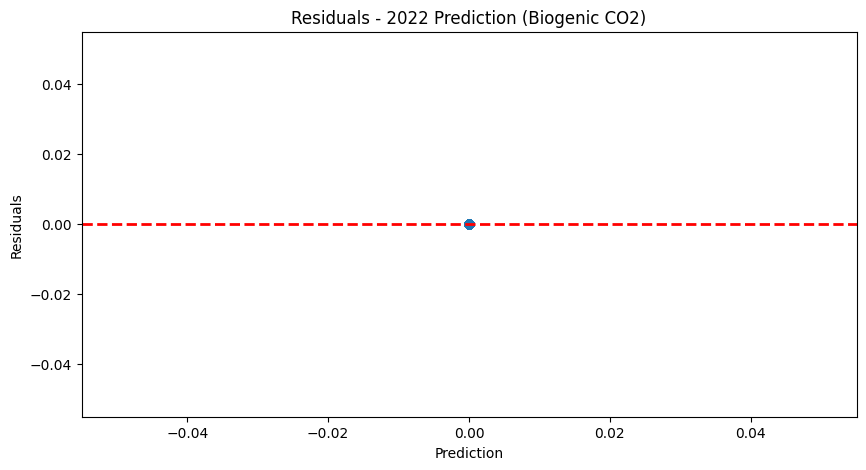

Modelo Random Forest (Biogenic CO2) salvo em: /content/drive/My Drive/rf_model_cuml_co2bio.pkl


3179

In [ ]:
# Random Forest - Unit Biogenic CO2 emissions usando cuML
import cudf
import matplotlib.pyplot as plt
from cuml.ensemble import RandomForestRegressor as cuRF
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Biogenic CO2 emissions (metric tons)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Biogenic CO2 emissions (metric tons)']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

n_estimators = 200
max_depth = 40

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Criar e treinar o modelo de Random Forest
    rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train_fold, y_train_fold)

    # Prever no fold de validação
    y_val_pred = rf_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    # Armazenar os resultados deste fold
    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com todos os dados de treino
best_rf_model = cuRF(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
best_rf_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões para 2022
y_pred_2022 = best_rf_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Biogenic CO2)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/rf_model_cuml_co2bio.pkl'
joblib.dump(best_rf_model, model_path)
print(f"Modelo Random Forest (Biogenic CO2) salvo em: {model_path}")

# Liberar memória
del(best_rf_model, rf_model)
gc.collect()


SVM Unit

In [ ]:
# SVM
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import gc

# Supondo que 'emissions_by_unit_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Nitrous Oxide (N2O) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Nitrous Oxide (N2O) emissions']

# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test_2022 = X_test_2022.astype('float32')
y_test_2022 = y_test_2022.astype('float32')

# Agora fazer a conversão para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# Treinamento sem validação cruzada para encontrar os melhores hiperparâmetros
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        svm_model = cuSVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train_cudf, y_train_cudf)

        # Prever e avaliar com o conjunto de teste
        y_val_pred = svm_model.predict(X_test_2022_cudf)
        r2_val = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

        print(f'C: {C}, gamma: {gamma}, R²: {r2_val}')

        if r2_val > best_r2:
            best_r2 = r2_val
            best_params = {'C': C, 'gamma': gamma}

print(f'Melhores parâmetros: {best_params}, com R²: {best_r2}')

# Treinamento final com os melhores parâmetros encontrados
best_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões de nitrogênio para 2022
y_pred_2022 = best_svm_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_nitro = '/content/drive/My Drive/svm_model_unit_cuml_nitro.pkl'

# Salvar o modelo treinado para nitrogênio
joblib.dump(best_svm_model, model_path_nitro)

print(f'Modelo de nitrogênio salvo no Google Drive: {model_path_nitro}')

# Apagar da memória
del(best_svm_model)
gc.collect()


In [ ]:
# SVM - Unit Nitrous Oxide (N2O) emissions com cuML
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Nitrous Oxide (N2O) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Nitrous Oxide (N2O) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# Procurar os melhores parâmetros (C e gamma) sem cross-validation
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        svm_model = cuSVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train_cudf, y_train_cudf)
        y_pred_train = svm_model.predict(X_train_cudf)
        r2_train = r2_score(y_train_cudf.to_arrow().to_pandas(), y_pred_train.to_arrow().to_pandas())

        print(f"C: {C}, gamma: {gamma}, Train R²: {r2_train}")

        if r2_train > best_r2:
            best_r2 = r2_train
            best_params = {'C': C, 'gamma': gamma}
        del(svm_model)
        gc.collect()

print(f"Melhores parâmetros encontrados: C = {best_params['C']}, gamma = {best_params['gamma']}")


# Treinamento com 10-Fold Cross-Validation usando os melhores parâmetros
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    svm_model.fit(X_train_fold, y_train_fold)

    y_val_pred = svm_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinamento final no conjunto completo
final_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train_cudf, y_train_cudf)

# Fazer previsões para 2022
y_pred_2022 = final_svm_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Salvar o modelo final no Google Drive
model_path = '/content/drive/My Drive/svm_model_cuml_unit_nitrous.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (Nitrous Oxide) salvo em: {model_path}")

# Liberar memória
del(final_svm_model, svm_model)
gc.collect()


In [ ]:
# SVM - Unit CO2 non-Biogenic emissions com cuML
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit CO2 emissions (non-biogenic)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit CO2 emissions (non-biogenic)']

# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF e float32
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# Etapa de busca de parâmetros: diferentes valores para C e gamma
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        # Recriar o modelo em cada iteração para evitar o erro
        svm_model = cuSVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train_cudf, y_train_cudf)

        # Avaliar no próprio conjunto de treinamento
        y_pred_train = svm_model.predict(X_train_cudf)
        r2_train = r2_score(y_train_cudf.to_arrow().to_pandas(), y_pred_train.to_arrow().to_pandas())

        print(f"C: {C}, gamma: {gamma}, Train R²: {r2_train}")

        if r2_train > best_r2:
            best_r2 = r2_train
            best_params = {'C': C, 'gamma': gamma}

print(f"Melhores parâmetros encontrados: C = {best_params['C']}, gamma = {best_params['gamma']}")

# Treinamento final usando os melhores parâmetros
final_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train_cudf, y_train_cudf)

# Previsões no conjunto de teste de 2022
y_pred_2022 = final_svm_model.predict(X_test_2022_cudf)

# Avaliação das previsões
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (CO2 non-Biogenic emissions)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/svm_model_cuml_unit_co2nonbio.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (CO2 non-Biogenic) salvo em: {model_path}")

# Liberar memória
del(final_svm_model)
gc.collect()


RuntimeError: exception occurred! file=/__w/cuml/cuml/cpp/src/svm/kernelcache.cuh line=444: Working set has already been initialized!
Obtained 63 stack frames
#1 in /usr/local/lib/python3.10/dist-packages/cuml/internals/../libcuml++.so: ML::SVM::KernelCache<float, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >::InitWorkingSet(int const*) +0x3e6 [0x7d14c126ecc6]
#2 in /usr/local/lib/python3.10/dist-packages/cuml/internals/../libcuml++.so: void ML::SVM::SmoSolver<float>::Solve<std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >(std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> >, int, int, float*, float const*, float**, int*, ML::SVM::SupportStorage<float>*, int**, float*, int, int) +0x3f5 [0x7d14c1286085]
#3 in /usr/local/lib/python3.10/dist-packages/cuml/internals/../libcuml++.so: void ML::SVM::svrFitX<float, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> > >(raft::handle_t const&, std::experimental::mdspan<float, std::experimental::extents<int, 18446744073709551615ul, 18446744073709551615ul>, std::experimental::layout_stride, raft::host_device_accessor<std::experimental::default_accessor<float>, (raft::memory_type)2> >, int, int, float*, ML::SVM::SvmParameter const&, raft::distance::kernels::KernelParams&, ML::SVM::SvmModel<float>&, float const*) +0x156 [0x7d14c12f0e96]
#4 in /usr/local/lib/python3.10/dist-packages/cuml/internals/../libcuml++.so: void ML::SVM::svrFit<float>(raft::handle_t const&, float*, int, int, float*, ML::SVM::SvmParameter const&, raft::distance::kernels::KernelParams&, ML::SVM::SvmModel<float>&, float const*) +0x4b [0x7d14c12f17eb]
#5 in /usr/local/lib/python3.10/dist-packages/cuml/svm/svr.cpython-310-x86_64-linux-gnu.so(+0x2d4fb) [0x7d14bb1e24fb]
#6 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x285e [0x59be9fff5a6e]
#7 in /usr/bin/python3(+0x16b281) [0x59bea0019281]
#8 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x613a [0x59be9fff934a]
#9 in /usr/bin/python3(+0x142016) [0x59be9fff0016]
#10 in /usr/bin/python3: PyEval_EvalCode +0x86 [0x59bea00e58b6]
#11 in /usr/bin/python3(+0x23d5fd) [0x59bea00eb5fd]
#12 in /usr/bin/python3(+0x15d689) [0x59bea000b689]
#13 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#14 in /usr/bin/python3(+0x17a8b0) [0x59bea00288b0]
#15 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x26f4 [0x59be9fff5904]
#16 in /usr/bin/python3(+0x17a8b0) [0x59bea00288b0]
#17 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x26f4 [0x59be9fff5904]
#18 in /usr/bin/python3(+0x17a8b0) [0x59bea00288b0]
#19 in /usr/bin/python3(+0x257fef) [0x59bea0105fef]
#20 in /usr/bin/python3(+0x168d1a) [0x59bea0016d1a]
#21 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x8ab [0x59be9fff3abb]
#22 in /usr/bin/python3: _PyFunction_Vectorcall +0x7c [0x59bea000b42c]
#23 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#24 in /usr/bin/python3: _PyFunction_Vectorcall +0x7c [0x59bea000b42c]
#25 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x8ab [0x59be9fff3abb]
#26 in /usr/bin/python3(+0x16b281) [0x59bea0019281]
#27 in /usr/bin/python3: PyObject_Call +0x122 [0x59bea0019f22]
#28 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x285e [0x59be9fff5a6e]
#29 in /usr/bin/python3(+0x16b281) [0x59bea0019281]
#30 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x1983 [0x59be9fff4b93]
#31 in /usr/bin/python3(+0x203c75) [0x59bea00b1c75]
#32 in /usr/bin/python3(+0x15d689) [0x59bea000b689]
#33 in /usr/bin/python3(+0x239505) [0x59bea00e7505]
#34 in /usr/bin/python3(+0x2b5e82) [0x59bea0163e82]
#35 in /usr/bin/python3(+0x15020b) [0x59be9fffe20b]
#36 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#37 in /usr/bin/python3: _PyFunction_Vectorcall +0x7c [0x59bea000b42c]
#38 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x8ab [0x59be9fff3abb]
#39 in /usr/bin/python3(+0x203c75) [0x59bea00b1c75]
#40 in /usr/bin/python3(+0x15d689) [0x59bea000b689]
#41 in /usr/bin/python3(+0x239505) [0x59bea00e7505]
#42 in /usr/bin/python3(+0x2b5e82) [0x59bea0163e82]
#43 in /usr/bin/python3(+0x15020b) [0x59be9fffe20b]
#44 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#45 in /usr/bin/python3(+0x16b281) [0x59bea0019281]
#46 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#47 in /usr/bin/python3(+0x203c75) [0x59bea00b1c75]
#48 in /usr/bin/python3(+0x15d689) [0x59bea000b689]
#49 in /usr/bin/python3(+0x239505) [0x59bea00e7505]
#50 in /usr/bin/python3(+0x2b5e82) [0x59bea0163e82]
#51 in /usr/bin/python3(+0x15020b) [0x59be9fffe20b]
#52 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x6bc [0x59be9fff38cc]
#53 in /usr/bin/python3(+0x16b3ce) [0x59bea00193ce]
#54 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x285e [0x59be9fff5a6e]
#55 in /usr/bin/python3(+0x17a8b0) [0x59bea00288b0]
#56 in /usr/bin/python3(+0x257fef) [0x59bea0105fef]
#57 in /usr/bin/python3(+0x168d1a) [0x59bea0016d1a]
#58 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x8ab [0x59be9fff3abb]
#59 in /usr/bin/python3(+0x16b4e1) [0x59bea00194e1]
#60 in /usr/bin/python3(+0x239505) [0x59bea00e7505]
#61 in /usr/bin/python3(+0x2b5e82) [0x59bea0163e82]
#62 in /usr/bin/python3(+0x15020b) [0x59be9fffe20b]
#63 in /usr/bin/python3: _PyEval_EvalFrameDefault +0x613a [0x59be9fff934a]


In [ ]:
# SVM - Unit Methane (CH4) emissions com cuML
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Methane (CH4) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Methane (CH4) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF e float32
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# Etapa de busca de parâmetros: diferentes valores para C e gamma
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        svm_model = cuSVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train_cudf, y_train_cudf)
        y_pred_train = svm_model.predict(X_train_cudf)
        r2_train = r2_score(y_train_cudf.to_arrow().to_pandas(), y_pred_train.to_arrow().to_pandas())

        print(f"C: {C}, gamma: {gamma}, Train R²: {r2_train}")

        if r2_train > best_r2:
            best_r2 = r2_train
            best_params = {'C': C, 'gamma': gamma}

print(f"Melhores parâmetros encontrados: C = {best_params['C']}, gamma = {best_params['gamma']}")

# 10-Fold Cross-Validation com os melhores parâmetros
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    svm_model.fit(X_train_fold, y_train_fold)

    y_val_pred = svm_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Exibir métricas médias do 10-Fold
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinamento final usando os melhores parâmetros
final_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train_cudf, y_train_cudf)

# Previsões no conjunto de teste de 2022
y_pred_2022 = final_svm_model.predict(X_test_2022_cudf)

# Avaliação das previsões
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/svm_model_cuml_unit_methane.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (Methane) salvo em: {model_path}")

# Liberar memória
del(final_svm_model, svm_model)
gc.collect()


In [ ]:
# SVM - Unit Biogenic CO2 emissions usando cuML
import cudf
import matplotlib.pyplot as plt
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Biogenic CO2 emissions (metric tons)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Biogenic CO2 emissions (metric tons)']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF e float32
X_train_cudf = cudf.DataFrame.from_pandas(X_train).astype('float32')
y_train_cudf = cudf.Series(y_train).astype('float32')
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022).astype('float32')
y_test_2022_cudf = cudf.Series(y_test_2022).astype('float32')

# Tuning inicial: testando diferentes valores de C e gamma
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

best_r2 = -float('inf')
best_params = {}

for C in param_grid['C']:
    for gamma in param_grid['gamma']:
        # Criar e treinar o modelo SVM
        svm_model = cuSVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train_cudf, y_train_cudf)

        # Prever no conjunto de teste
        y_pred_val = svm_model.predict(X_test_2022_cudf)
        r2_val = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_val.to_arrow().to_pandas())

        if r2_val > best_r2:
            best_r2 = r2_val
            best_params = {'C': C, 'gamma': gamma}

print(f'Melhores parâmetros encontrados: {best_params}')

# 10-Fold Cross-Validation com os melhores parâmetros
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Treinar o modelo SVM com os melhores parâmetros
    best_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    best_svm_model.fit(X_train_fold, y_train_fold)

    # Prever no fold de validação
    y_val_pred = best_svm_model.predict(X_val_fold)

    # Avaliar o desempenho do modelo neste fold
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred.to_arrow().to_pandas())

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com os melhores parâmetros usando todos os dados de treino
final_svm_model = cuSVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train_cudf, y_train_cudf)

# Prever as emissões para 2022
y_pred_2022 = final_svm_model.predict(X_test_2022_cudf)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022.to_arrow().to_pandas())

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022.to_arrow().to_pandas()
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022.to_arrow().to_pandas(), residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Biogenic CO2)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/svm_model_cuml_unit_co2bio.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (Biogenic CO2) salvo em: {model_path}")

# Liberar memória
del(final_svm_model, svm_model)
gc.collect()


LightGBM

In [ ]:
# LightGBM com 10-Fold Cross-Validation para Stacking
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_unit_methane.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_unit_methane.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Methane (CH4) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Methane (CH4) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation para empilhamento
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Previsões dos modelos base (Random Forest e SVM)
    rf_pred_train = rf_model.predict(X_train_fold).to_pandas()
    rf_pred_val = rf_model.predict(X_val_fold).to_pandas()

    svm_pred_train = svm_model.predict(X_train_fold).to_pandas()
    svm_pred_val = svm_model.predict(X_val_fold).to_pandas()

    # Empilhamento manual: Combinar previsões dos modelos base
    train_stack = pd.DataFrame({
        'rf_pred': rf_pred_train,
        'svm_pred': svm_pred_train
    })

    val_stack = pd.DataFrame({
        'rf_pred': rf_pred_val,
        'svm_pred': svm_pred_val
    })

    # Definir o modelo meta (LightGBM)
    lgbm_model = lgb.LGBMRegressor(random_state=42)

    # Treinar o meta-modelo no conjunto de treino empilhado
    lgbm_model.fit(train_stack, y_train_fold.to_pandas())

    # Fazer previsões no conjunto de validação empilhado
    y_val_pred = lgbm_model.predict(val_stack)

    # Avaliar o desempenho no fold de validação
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com todos os dados de treino empilhado
rf_pred_train_final = rf_model.predict(X_train_cudf).to_pandas()
svm_pred_train_final = svm_model.predict(X_train_cudf).to_pandas()

train_stack_final = pd.DataFrame({
    'rf_pred': rf_pred_train_final,
    'svm_pred': svm_pred_train_final
})

lgbm_model.fit(train_stack_final, y_train_cudf.to_pandas())

# Fazer previsões no conjunto de teste empilhado
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar as previsões no conjunto de teste
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - Methane)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_methane = '/content/drive/My Drive/lgbm_stacking_model_unit_methane.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_methane)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_methane}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


In [ ]:
# LightGBM com 10-Fold Cross-Validation para Stacking
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_unit_nitrous.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_unit_nitrous.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Nitrous Oxide (N2O) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Nitrous Oxide (N2O) emissions']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation para empilhamento
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Previsões dos modelos base (Random Forest e SVM)
    rf_pred_train = rf_model.predict(X_train_fold).to_pandas()
    rf_pred_val = rf_model.predict(X_val_fold).to_pandas()

    svm_pred_train = svm_model.predict(X_train_fold).to_pandas()
    svm_pred_val = svm_model.predict(X_val_fold).to_pandas()

    # Empilhamento manual: Combinar previsões dos modelos base
    train_stack = pd.DataFrame({
        'rf_pred': rf_pred_train,
        'svm_pred': svm_pred_train
    })

    val_stack = pd.DataFrame({
        'rf_pred': rf_pred_val,
        'svm_pred': svm_pred_val
    })

    # Definir o modelo meta (LightGBM)
    lgbm_model = lgb.LGBMRegressor(random_state=42)

    # Treinar o meta-modelo no conjunto de treino empilhado
    lgbm_model.fit(train_stack, y_train_fold.to_pandas())

    # Fazer previsões no conjunto de validação empilhado
    y_val_pred = lgbm_model.predict(val_stack)

    # Avaliar o desempenho no fold de validação
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com todos os dados de treino empilhado
rf_pred_train_final = rf_model.predict(X_train_cudf).to_pandas()
svm_pred_train_final = svm_model.predict(X_train_cudf).to_pandas()

train_stack_final = pd.DataFrame({
    'rf_pred': rf_pred_train_final,
    'svm_pred': svm_pred_train_final
})

lgbm_model.fit(train_stack_final, y_train_cudf.to_pandas())

# Fazer previsões no conjunto de teste empilhado
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar as previsões no conjunto de teste
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_methane = '/content/drive/My Drive/lgbm_stacking_model_unit_nitrous.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_methane)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_methane}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


In [ ]:
# LightGBM com 10-Fold Cross-Validation para Stacking
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_unit_co2bio.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_unit_co2bio.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Biogenic CO2 emissions (metric tons)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Biogenic CO2 emissions (metric tons)']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation para empilhamento
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Previsões dos modelos base (Random Forest e SVM)
    rf_pred_train = rf_model.predict(X_train_fold).to_pandas()
    rf_pred_val = rf_model.predict(X_val_fold).to_pandas()

    svm_pred_train = svm_model.predict(X_train_fold).to_pandas()
    svm_pred_val = svm_model.predict(X_val_fold).to_pandas()

    # Empilhamento manual: Combinar previsões dos modelos base
    train_stack = pd.DataFrame({
        'rf_pred': rf_pred_train,
        'svm_pred': svm_pred_train
    })

    val_stack = pd.DataFrame({
        'rf_pred': rf_pred_val,
        'svm_pred': svm_pred_val
    })

    # Definir o modelo meta (LightGBM)
    lgbm_model = lgb.LGBMRegressor(random_state=42)

    # Treinar o meta-modelo no conjunto de treino empilhado
    lgbm_model.fit(train_stack, y_train_fold.to_pandas())

    # Fazer previsões no conjunto de validação empilhado
    y_val_pred = lgbm_model.predict(val_stack)

    # Avaliar o desempenho no fold de validação
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com todos os dados de treino empilhado
rf_pred_train_final = rf_model.predict(X_train_cudf).to_pandas()
svm_pred_train_final = svm_model.predict(X_train_cudf).to_pandas()

train_stack_final = pd.DataFrame({
    'rf_pred': rf_pred_train_final,
    'svm_pred': svm_pred_train_final
})

lgbm_model.fit(train_stack_final, y_train_cudf.to_pandas())

# Fazer previsões no conjunto de teste empilhado
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar as previsões no conjunto de teste
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - CO2 Biogenic)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_methane = '/content/drive/My Drive/lgbm_stacking_model_unit_co2bio.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_methane)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_methane}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


In [ ]:
# LightGBM com 10-Fold Cross-Validation para Stacking
import cudf
import pandas as pd
import lightgbm as lgb
from cuml.ensemble import RandomForestRegressor as cuRF
from cuml.svm import SVR as cuSVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import joblib
import gc

# Carregar os modelos do Google Drive
rf_model_path = '/content/drive/My Drive/rf_model_cuml_unit_co2nonbio.pkl'
svm_model_path = '/content/drive/My Drive/svm_model_cuml_unit_co2nonbio.pkl'

rf_model = joblib.load(rf_model_path)
svm_model = joblib.load(svm_model_path)

# Supondo que 'emissions_by_fuel_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_fuel_cleaned[emissions_by_fuel_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit CO2 emissions (non-biogenic)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit CO2 emissions (non-biogenic)']


# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para cuDF
X_train_cudf = cudf.DataFrame.from_pandas(X_train)
y_train_cudf = cudf.Series(y_train)
X_test_2022_cudf = cudf.DataFrame.from_pandas(X_test_2022)
y_test_2022_cudf = cudf.Series(y_test_2022)

# 10-Fold Cross-Validation para empilhamento
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train_cudf):
    X_train_fold, X_val_fold = X_train_cudf.iloc[train_index], X_train_cudf.iloc[val_index]
    y_train_fold, y_val_fold = y_train_cudf.iloc[train_index], y_train_cudf.iloc[val_index]

    # Previsões dos modelos base (Random Forest e SVM)
    rf_pred_train = rf_model.predict(X_train_fold).to_pandas()
    rf_pred_val = rf_model.predict(X_val_fold).to_pandas()

    svm_pred_train = svm_model.predict(X_train_fold).to_pandas()
    svm_pred_val = svm_model.predict(X_val_fold).to_pandas()

    # Empilhamento manual: Combinar previsões dos modelos base
    train_stack = pd.DataFrame({
        'rf_pred': rf_pred_train,
        'svm_pred': svm_pred_train
    })

    val_stack = pd.DataFrame({
        'rf_pred': rf_pred_val,
        'svm_pred': svm_pred_val
    })

    # Definir o modelo meta (LightGBM)
    lgbm_model = lgb.LGBMRegressor(random_state=42)

    # Treinar o meta-modelo no conjunto de treino empilhado
    lgbm_model.fit(train_stack, y_train_fold.to_pandas())

    # Fazer previsões no conjunto de validação empilhado
    y_val_pred = lgbm_model.predict(val_stack)

    # Avaliar o desempenho no fold de validação
    r2_val = r2_score(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mae_val = mean_absolute_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)
    mse_val = mean_squared_error(y_val_fold.to_arrow().to_pandas(), y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Calcular e exibir a média das métricas para todos os folds
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinar o modelo final com todos os dados de treino empilhado
rf_pred_train_final = rf_model.predict(X_train_cudf).to_pandas()
svm_pred_train_final = svm_model.predict(X_train_cudf).to_pandas()

train_stack_final = pd.DataFrame({
    'rf_pred': rf_pred_train_final,
    'svm_pred': svm_pred_train_final
})

lgbm_model.fit(train_stack_final, y_train_cudf.to_pandas())

# Fazer previsões no conjunto de teste empilhado
rf_pred_test = rf_model.predict(X_test_2022_cudf).to_pandas()
svm_pred_test = svm_model.predict(X_test_2022_cudf).to_pandas()

test_stack = pd.DataFrame({
    'rf_pred': rf_pred_test,
    'svm_pred': svm_pred_test
})

y_pred_2022 = lgbm_model.predict(test_stack)

# Avaliar as previsões no conjunto de teste
mae = mean_absolute_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
mse = mean_squared_error(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)
r2 = r2_score(y_test_2022_cudf.to_arrow().to_pandas(), y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022_cudf.to_arrow().to_pandas() - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (LightGBM Stacking - CO2 Non-Biogenic)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_lgbm_methane = '/content/drive/My Drive/lgbm_stacking_model_unit_co2nonbio.pkl'

# Salvar o modelo treinado
joblib.dump(lgbm_model, model_path_lgbm_methane)

print(f'Modelo LightGBM Stacking salvo no Google Drive: {model_path_lgbm_methane}')

# Apagar modelos da memória
del(rf_model, svm_model, lgbm_model)
gc.collect()


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
# SVM - Unit Nitrous Oxide (N2O) emissions com scikit-learn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import gc

# Supondo que 'emissions_by_unit_cleaned' já está preparado com 'Reporting Year' como integer

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Nitrous Oxide (N2O) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Nitrous Oxide (N2O) emissions']

# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test_2022 = X_test_2022.astype('float32')
y_test_2022 = y_test_2022.astype('float32')

# Treinamento sem validação cruzada para encontrar os melhores hiperparâmetros
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        svm_model = SVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)

        # Prever e avaliar com o conjunto de teste
        y_val_pred = svm_model.predict(X_test_2022)
        r2_val = r2_score(y_test_2022, y_val_pred)

        print(f'C: {C}, gamma: {gamma}, R²: {r2_val}')

        if r2_val > best_r2:
            best_r2 = r2_val
            best_params = {'C': C, 'gamma': gamma}

print(f'Melhores parâmetros: {best_params}, com R²: {best_r2}')

# Treinamento final com os melhores parâmetros encontrados
best_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
best_svm_model.fit(X_train, y_train)

# Prever as emissões de nitrogênio para 2022
y_pred_2022 = best_svm_model.predict(X_test_2022)

# Avaliar as previsões para 2022
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos para 2022
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Nitrous Oxide)')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path_nitro = '/content/drive/My Drive/svm_model_unit_cpu_nitro.pkl'

# Salvar o modelo treinado para nitrogênio
joblib.dump(best_svm_model, model_path_nitro)

print(f'Modelo de nitrogênio salvo no Google Drive: {model_path_nitro}')

# Apagar da memória
del(best_svm_model)
gc.collect()


In [ ]:
# SVM - Unit Methane (CH4) emissions com sklearn e pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit Methane (CH4) emissions']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit Methane (CH4) emissions']

# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter para float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test_2022 = X_test_2022.astype('float32')
y_test_2022 = y_test_2022.astype('float32')

# Etapa de busca de parâmetros: diferentes valores para C e gamma
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        svm_model = SVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)
        y_pred_train = svm_model.predict(X_train)
        r2_train = r2_score(y_train, y_pred_train)

        print(f"C: {C}, gamma: {gamma}, Train R²: {r2_train}")

        if r2_train > best_r2:
            best_r2 = r2_train
            best_params = {'C': C, 'gamma': gamma}

print(f"Melhores parâmetros encontrados: C = {best_params['C']}, gamma = {best_params['gamma']}")

# 10-Fold Cross-Validation com os melhores parâmetros
kf = KFold(n_splits=10, shuffle=True, random_state=42)
fold_r2_scores = []
fold_mae_scores = []
fold_mse_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
    svm_model.fit(X_train_fold, y_train_fold)

    y_val_pred = svm_model.predict(X_val_fold)
    r2_val = r2_score(y_val_fold, y_val_pred)
    mae_val = mean_absolute_error(y_val_fold, y_val_pred)
    mse_val = mean_squared_error(y_val_fold, y_val_pred)

    fold_r2_scores.append(r2_val)
    fold_mae_scores.append(mae_val)
    fold_mse_scores.append(mse_val)

# Exibir métricas médias do 10-Fold
mean_r2 = sum(fold_r2_scores) / kf.n_splits
mean_mae = sum(fold_mae_scores) / kf.n_splits
mean_mse = sum(fold_mse_scores) / kf.n_splits

print(f'10-Fold Cross-Validation Results:')
print(f'Average MAE: {mean_mae}')
print(f'Average MSE: {mean_mse}')
print(f'Average R²: {mean_r2}')

# Treinamento final usando os melhores parâmetros
final_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste de 2022
y_pred_2022 = final_svm_model.predict(X_test_2022)

# Avaliação das previsões
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (Methane)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/svm_model_unit_methane.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (Methane) salvo no Google Drive: {model_path}")

# Liberar memória
del(final_svm_model, svm_model)
gc.collect()


In [ ]:
# SVM - Unit CO2 non-Biogenic emissions com sklearn e pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import gc

# 1. Filtrar dados até o ano de 2021
data_train = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] <= 2021]
data_test_2022 = emissions_by_unit_cleaned[emissions_by_unit_cleaned['Reporting Year'] == 2022]

# 2. Definir X e y para treino
X_train = data_train.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_train = data_train['Unit CO2 emissions (non-biogenic)']

# 3. Usar os dados de 2022 como validação
X_test_2022 = data_test_2022.drop(columns=['Unit CO2 emissions (non-biogenic)', 'Unit Methane (CH4) emissions', 'Unit Nitrous Oxide (N2O) emissions', 'Unit Biogenic CO2 emissions (metric tons)'])
y_test_2022 = data_test_2022['Unit CO2 emissions (non-biogenic)']

# Renomear colunas duplicadas em X_train e X_test_2022
def rename_duplicated_columns(df):
    cols = pd.Series(df.columns)
    for dup in cols[cols.duplicated()].unique():
        cols[cols[cols == dup].index.values.tolist()] = [f"{dup}_{i}" if i != 0 else dup for i in range(sum(cols == dup))]
    df.columns = cols
    return df

X_train = rename_duplicated_columns(X_train)
X_test_2022 = rename_duplicated_columns(X_test_2022)

# Converter X e y para float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test_2022 = X_test_2022.astype('float32')
y_test_2022 = y_test_2022.astype('float32')

# Etapa de busca de parâmetros: diferentes valores para C e gamma
best_r2 = -float('inf')
best_params = None

for C in [0.1, 1.0, 10.0]:
    for gamma in [0.01, 0.1, 1.0]:
        # Criar o modelo SVM com os parâmetros atuais
        svm_model = SVR(kernel='rbf', C=C, gamma=gamma)
        svm_model.fit(X_train, y_train)

        # Avaliar no próprio conjunto de treinamento
        y_pred_train = svm_model.predict(X_train)
        r2_train = r2_score(y_train, y_pred_train)

        print(f"C: {C}, gamma: {gamma}, Train R²: {r2_train}")

        if r2_train > best_r2:
            best_r2 = r2_train
            best_params = {'C': C, 'gamma': gamma}

print(f"Melhores parâmetros encontrados: C = {best_params['C']}, gamma = {best_params['gamma']}")

# Treinamento final usando os melhores parâmetros
final_svm_model = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
final_svm_model.fit(X_train, y_train)

# Previsões no conjunto de teste de 2022
y_pred_2022 = final_svm_model.predict(X_test_2022)

# Avaliação das previsões
mae = mean_absolute_error(y_test_2022, y_pred_2022)
mse = mean_squared_error(y_test_2022, y_pred_2022)
r2 = r2_score(y_test_2022, y_pred_2022)

print(f'MAE (2022): {mae}')
print(f'MSE (2022): {mse}')
print(f'R² (2022): {r2}')

# Gráfico de Resíduos
residuals_2022 = y_test_2022 - y_pred_2022
plt.figure(figsize=(10, 5))
plt.scatter(y_pred_2022, residuals_2022, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals - 2022 Prediction (CO2 non-Biogenic emissions)')
plt.xlabel('Prediction')
plt.ylabel('Residuals')
plt.show()

# Caminho para salvar o modelo no Google Drive
model_path = '/content/drive/My Drive/svm_model_unit_co2nonbio.pkl'
joblib.dump(final_svm_model, model_path)
print(f"Modelo SVM (CO2 non-Biogenic) salvo no Google Drive: {model_path}")

# Liberar memória
del(final_svm_model, svm_model)
gc.collect()
